In [1]:
#we run the train 10 times for enemy 5 for algorithm 1
from evoman_wrapper.EvomanWrapper import EvomanWrapper

"""
1. Setup config
"""

for run_index in range(1, 11):
    EXPERIMENT_NAME = "FirstEverExperiment{}_enemy5".format(run_index)
    print(EXPERIMENT_NAME)
    hidden_layers = 10
    number_of_sensors = 20
    config = {
        "config_type": "train",
        "hidden_layers": 10,
        "number_of_sensors": 20,
        "experiment_name": EXPERIMENT_NAME,
        "environment_config": {
            "experiment_name": EXPERIMENT_NAME,
            "enemies": [5],
            "playermode": "ai",
            "enemymode": "static",
            "level": 2,
            "speed": "fastest",
            "logs": "off",
            "player_controller": None,
        },
        "controller": {
            "instance": "NNController",
            "constructor": {
                "n_hidden": 10
            }
        },
        "evolutionary_algorithm": {
            "instance": "EvolutionaryAlgorithm_1",
            "constructor": {
                "number_of_genomes": (number_of_sensors + 1) * hidden_layers + (hidden_layers + 1) * 5,
                "number_of_parents": 10,
                "number_of_offsprings": 10,
                "population_size": 20,
                "max_generations": 25,
                "mutation_chance": 0.5,
            }
        },
    }
    evoman_wrapper = EvomanWrapper(config).train()
    import matplotlib.pyplot as plt
    import numpy as np
    import pathlib
    from evoman_wrapper.persistence.DiskUtils import DiskUtils
    import numpy as np
    import statistics
    #We want to find the averages of the maxs for each generation for a specific run
    EXPERIMENT_NAME = "FirstEverExperiment{}_enemy5".format(run_index)
    GENERATION = 25
    FILE_NAME = "Overview.json"
    path = pathlib.Path("{}/train/Generation{}/{}".format(EXPERIMENT_NAME, GENERATION, FILE_NAME)).resolve()
    last_generation_overview = DiskUtils.load(path)
    M=last_generation_overview['fitness_mean_history']
    k=max(M)
    BestGeneration = M.index(k)
    print(BestGeneration)
    #We find the best generation(Highest Fitness Score) for a specific run and we test it for 5 times
    config1 = {
            "config_type": "test",
            "hidden_layers": 10,
            "number_of_sensors": 20,
            "experiment_name": EXPERIMENT_NAME,
            "chosen_generation": BestGeneration,
            "environment_config": {
                "experiment_name": EXPERIMENT_NAME,
                "enemies": [5],
                "playermode": "ai",
                "enemymode": "static",
                "level": 2,
                "speed": "fastest",
                "logs": "off",
                "player_controller": None,
            },
            "evolutionary_algorithm": None,
            "controller": {
                "instance": "NNController",
                "constructor": {
                    "n_hidden": 10
                }
            },
            "games": [


                {"enemies": [5]},
                {"enemies": [5]},
                {"enemies": [5]},
                {"enemies": [5]},
                {"enemies": [5]}






            ]
        }
    evoman_wrapper = EvomanWrapper(config1).test()

C:\Users\popil\Desktop\evolutionary_algorithms
pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
FirstEverExperiment1_enemy5
C:\Users\popil\Desktop\evolutionary_algorithms\FirstEverExperiment1_enemy5\train\config.json
{'config_type': 'train', 'hidden_layers': 10, 'number_of_sensors': 20, 'experiment_name': 'FirstEverExperiment1_enemy5', 'environment_config': {'experiment_name': 'FirstEverExperiment1_enemy5', 'enemies': [5], 'playermode': 'ai', 'enemymode': 'static', 'level': 2, 'speed': 'fastest', 'logs': 'off', 'player_controller': None}, 'controller': {'instance': 'NNController', 'constructor': {'n_hidden': 10}}, 'evolutionary_algorithm': {'instance': 'EvolutionaryAlgorithm_1', 'constructor': {'number_of_genomes': 265, 'number_of_parents': 10, 'number_of_offsprings': 10, 'population_size': 20, 'max_generations': 25, 'mutation_chance': 0.5}}}

C:\Users\popil\Desktop\evolutionary_algorithms\FirstEverExperiment1_enemy5\train\

In [26]:
import statistics
Test_Values_5_resits=[[86.94324619773174,87.78324619773174,86.64324619773174,87.12324619773175,85.92324619773174],[86.50964054567595,87.21288973525115,86.60957298262515,87.21288973525115,87.03288973525115],[91.42791083107561,91.54791083107561,91.12791083107561,91.00791083107562,91.36791083107562],[-5.007755278982113,-2.0077552789821063,-4.107755278982111,-1.7677552789821052,-6.087755278982113],[87.24324619773175,88.52901301948917,87.84324619773174,87.00324619773174,87.30324619773175],[87.00324619773174,87.00324619773174,88.40901301948917,86.94324619773174,86.94324619773174],[86.88324619773175,86.94324619773174,88.40901301948917,87.96324619773175,86.70324619773174],[88.84964054567598,87.03288973525115,87.80234767677737,86.50964054567595,87.91925648420771],[88.97959913428288,86.5130246436602,88.45419793370404,88.45419793370404,87.33288973525114],[91.06791083107562,90.94791083107562,91.36791083107562,91.06791083107562,91.00791083107562]]
L=[16,19,11,14,5,3,24,15,23,24]
Test_Values=[]
for i in Test_Values_5_resits:
    s=statistics.mean(i)
    Test_Values.append(s)
print(Test_Values)

[86.88324619773174, 86.91557654681091, 91.29591083107562, -3.79575527898211, 87.58439956208323, 87.26039956208322, 87.38039956208323, 87.62275499751763, 87.94678187612045, 91.09191083107562]


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from evoman_wrapper.persistence.DiskUtils import DiskUtils
import numpy as np
all_data1 = {}
for run_index in range(1, 11):
    EXPERIMENT_NAME  = "FirstEverExperiment{}_enemy5".format(run_index)
    max_generation_index = 25
    max_individual_index = 20

    for generation_index in range(0, max_generation_index):
        simulation_file = "{}/train/Generation{}/Overview.json".format(EXPERIMENT_NAME, generation_index)
        path = pathlib.Path(simulation_file).resolve()
        simulation_json = DiskUtils.load(path)
        unique_simulation = (EXPERIMENT_NAME, generation_index)
        all_data1[unique_simulation] = simulation_json

#print(all_data1)
#print(all_data1[('FirstEverExperiment1_enemy5', 24)]['fitness_max_history'])
#print(all_data1[('FirstEverExperiment1_enemy5', 24)]['fitness_mean_history'])
GMean=[]
GMax=[]
for i in range(1,11):
    GMean.append(all_data1[('FirstEverExperiment{}_enemy5'.format(i), 24)]['fitness_mean_history'])
    GMax.append(all_data1[('FirstEverExperiment{}_enemy5'.format(i), 24)]['fitness_max_history']) 
#we find the list of the averages of the means over the generations
Gen1=[]
L1=[]
for j in range(0,25):
    for i in range(0,10):
        L1.append(GMean[i][j])
    Gen1.append(L1)
    L1=[]   
AvMeansList=[]
for i in Gen1:
    m1=sum(i)/10
    AvMeansList.append(m1)
##we find the list of the averages of the maxs over the generations
Gen2=[]
L2=[]
for j in range(0,25):
    for i in range(0,10):
        L2.append(GMax[i][j])
    Gen2.append(L2)
    L2=[]   
AvMaxsList=[]
for i in Gen2:
    m2=sum(i)/10
    AvMaxsList.append(m2)
#print(AvMeansList)
#print(AvMaxsList)

In [3]:
GMean=[]
GMax=[]
for i in range(1,11):
    GMean.append(all_data1[('FirstEverExperiment{}_enemy5'.format(i), 24)]['fitness_mean_history'])
    GMax.append(all_data1[('FirstEverExperiment{}_enemy5'.format(i), 24)]['fitness_max_history']) 
#we find the list of the averages of the means over the generations
Gen11=[]
L11=[]
for j in range(0,25):
    for i in range(0,10):
        L11.append(GMean[i][j])
    Gen11.append(L11)
    L11=[]   
StdMeansList=[]
for i in Gen11:
    m11=np.std(i)
    StdMeansList.append(m11)
##we find the list of the averages of the maxs over the generations
Gen22=[]
L22=[]
for j in range(0,25):
    for i in range(0,10):
        L22.append(GMax[i][j])
    Gen22.append(L22)
    L22=[]   
StdMaxsList=[]
for i in Gen22:
    m22=np.std(i)
    StdMaxsList.append(m22)

In [32]:
import statistics
Test_Values_5_resits=[[86.94324619773174,87.78324619773174,86.64324619773174,87.12324619773175,85.92324619773174],[86.50964054567595,87.21288973525115,86.60957298262515,87.21288973525115,87.03288973525115],[91.42791083107561,91.54791083107561,91.12791083107561,91.00791083107562,91.36791083107562],[0,0,0,0,0],[87.24324619773175,88.52901301948917,87.84324619773174,87.00324619773174,87.30324619773175],[87.00324619773174,87.00324619773174,88.40901301948917,86.94324619773174,86.94324619773174],[86.88324619773175,86.94324619773174,88.40901301948917,87.96324619773175,86.70324619773174],[88.84964054567598,87.03288973525115,87.80234767677737,86.50964054567595,87.91925648420771],[88.97959913428288,86.5130246436602,88.45419793370404,88.45419793370404,87.33288973525114],[91.06791083107562,90.94791083107562,91.36791083107562,91.06791083107562,91.00791083107562]]
L=[16,19,11,14,5,3,24,15,23,24]
Test_Values=[]
for i in Test_Values_5_resits:
    s=statistics.mean(i)
    Test_Values.append(s)
print(Test_Values)

[86.88324619773174, 86.91557654681091, 91.29591083107562, 0, 87.58439956208323, 87.26039956208322, 87.38039956208323, 87.62275499751763, 87.94678187612045, 91.09191083107562]


In [8]:
%cd C://Users/popil/Desktop/evolutionary_algorithms
#we run the train 10 times for enemy 5 for algorithm 1
from evoman_wrapper.EvomanWrapper import EvomanWrapper

"""
1. Setup config
"""

for run_index in range(1, 11):
    EXPERIMENT_NAME = "ExperimentLR{}_enemy5".format(run_index)
    print(EXPERIMENT_NAME)
    hidden_layers = 10
    number_of_sensors = 20
    config = {
        "config_type": "train",
        "hidden_layers": 10,
        "number_of_sensors": 20,
        "experiment_name": EXPERIMENT_NAME,
        "environment_config": {
            "experiment_name": EXPERIMENT_NAME,
            "enemies": [5],
            "playermode": "ai",
            "enemymode": "static",
            "level": 2,
            "speed": "fastest",
            "logs": "off",
            "player_controller": None,
        },
        "controller": {
            "instance": "NNController",
            "constructor": {
                "n_hidden": 10
            }
        },
        "evolutionary_algorithm": {
            "instance": "EvolutionaryAlgorithm_2",
            "constructor": {
                "number_of_genomes": (number_of_sensors + 1) * hidden_layers + (hidden_layers + 1) * 5,
                "number_of_parents": 10,
                "number_of_offsprings": 10,
                "population_size": 20,
                "max_generations": 25,
                "mutation_chance": 0.5,
            }
        },
    }
    evoman_wrapper = EvomanWrapper(config).train()
    import matplotlib.pyplot as plt
    import numpy as np
    import pathlib
    from evoman_wrapper.persistence.DiskUtils import DiskUtils
    import numpy as np
    import statistics
    #We want to find the averages of the maxs for each generation for a specific run
    EXPERIMENT_NAME = "ExperimentLR{}_enemy5".format(run_index)
    GENERATION = 25
    FILE_NAME = "Overview.json"
    path = pathlib.Path("{}/train/Generation{}/{}".format(EXPERIMENT_NAME, GENERATION, FILE_NAME)).resolve()
    last_generation_overview = DiskUtils.load(path)
    M=last_generation_overview['fitness_mean_history']
    k=max(M)
    BestGeneration = M.index(k)
    print(BestGeneration)
    #We find the best generation(Highest Fitness Score) for a specific run and we test it for 5 times
    config = {
            "config_type": "test",
            "hidden_layers": 10,
            "number_of_sensors": 20,
            "experiment_name": EXPERIMENT_NAME,
            "chosen_generation": BestGeneration,
            "environment_config": {
                "experiment_name": EXPERIMENT_NAME,
                "enemies": [5],
                "playermode": "ai",
                "enemymode": "static",
                "level": 2,
                "speed": "fastest",
                "logs": "off",
                "player_controller": None,
            },
            "evolutionary_algorithm": None,
            "controller": {
                "instance": "NNController",
                "constructor": {
                    "n_hidden": 10
                }
            },
            "games": [


                {"enemies": [5]},
                {"enemies": [5]},
                {"enemies": [5]},
                {"enemies": [5]},
                {"enemies": [5]}






            ]
        }
    evoman_wrapper = EvomanWrapper(config).test()

C:\Users\popil\Desktop\evolutionary_algorithms
ExperimentLR1_enemy5
C:\Users\popil\Desktop\evolutionary_algorithms\ExperimentLR1_enemy5\train\config.json
{'config_type': 'train', 'hidden_layers': 10, 'number_of_sensors': 20, 'experiment_name': 'ExperimentLR1_enemy5', 'environment_config': {'experiment_name': 'ExperimentLR1_enemy5', 'enemies': [5], 'playermode': 'ai', 'enemymode': 'static', 'level': 2, 'speed': 'fastest', 'logs': 'off', 'player_controller': None}, 'controller': {'instance': 'NNController', 'constructor': {'n_hidden': 10}}, 'evolutionary_algorithm': {'instance': 'EvolutionaryAlgorithm_2', 'constructor': {'number_of_genomes': 265, 'number_of_parents': 10, 'number_of_offsprings': 10, 'population_size': 20, 'max_generations': 25, 'mutation_chance': 0.5}}}

C:\Users\popil\Desktop\evolutionary_algorithms\ExperimentLR1_enemy5\train\Generation0\Individual_0.json
{'current_generation_number': 0, 'individual_index': 0, 'simulation_fitness': -2.9677552789821084, 'player_energy': 3

In [31]:
import statistics
Test_Values_5_resits=[[0,0,0,0,0],[90.2052886203982,90.44901301948917,90.38901301948917,90.44901301948917,90.26901301948917],[92.47315225241282,91.98110614572687,92.81185751001958,92.81185751001958,92.69185751001957],[38.289476890547576,56.170206262487575,47.28098684561474,47.397412107810666,29.173454776443407],[0,0,0,0,0],[1.7122447210178766,0.21224472101789083,0.8722447210178847,1.2922447210178802,1.5922447210178774],[0,2.8558143658743544,2.9155005869248285,0,2.8558143658743544],[0,0,0,0,0],[1.2322447210178815,1.7722447210178753,1.172244721017881,1.5922447210178774,1.5922447210178774],[0.8122447210178851,1.8922447210178746,1.0522447210178827,2.0722447210178725,0.8122447210178851]]
L=[0,18,21,17,0,0,22,0,0,17]
Test_Values1=[]
for i in Test_Values_5_resits:
    s=statistics.mean(i)
    Test_Values1.append(s)
print(Test_Values1)

[0, 90.35226813967098, 92.55396618563968, 43.66230737658079, 0, 1.1362447210178819, 1.7254258637347075, 0, 1.4722447210178786, 1.32824472101788]


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from evoman_wrapper.persistence.DiskUtils import DiskUtils
import numpy as np
all_data2 = {}
for run_index in range(1, 11):
    EXPERIMENT_NAME  = "ExperimentLR{}_enemy5".format(run_index)
    max_generation_index = 25
    max_individual_index = 20

    for generation_index in range(0, max_generation_index):
        simulation_file = "{}/train/Generation{}/Overview.json".format(EXPERIMENT_NAME, generation_index)
        path = pathlib.Path(simulation_file).resolve()
        simulation_json = DiskUtils.load(path)
        unique_simulation = (EXPERIMENT_NAME, generation_index)
        all_data2[unique_simulation] = simulation_json
GMean2=[]
GMax2=[]
for i in range(1,11):
    GMean2.append(all_data2[('ExperimentLR{}_enemy5'.format(i), 24)]['fitness_mean_history'])
    GMax2.append(all_data2[('ExperimentLR{}_enemy5'.format(i), 24)]['fitness_max_history']) 
#we find the list of the averages of the means over the generations
Gen3=[]
L3=[]
for j in range(0,25):
    for i in range(0,10):
        L3.append(GMean2[i][j])
    Gen3.append(L3)
    L3=[]   
AvMeansList3=[]
for i in Gen3:
    m3=sum(i)/10
    AvMeansList3.append(m3)
##we find the list of the averages of the maxs over the generations
Gen4=[]
L4=[]
for j in range(0,25):
    for i in range(0,10):
        L4.append(GMax2[i][j])
    Gen4.append(L4)
    L4=[]   
AvMaxsList4=[]
for i in Gen4:
    m4=sum(i)/10
    AvMaxsList4.append(m4)
print(AvMaxsList4)
print(AvMeansList3)

[86.84340998790447, 41.25301136852002, 44.07047525799767, 42.223119135503445, 44.88086992589207, 46.065840178340856, 46.19544091274233, 43.82693369631274, 47.791242365801175, 46.519128619481116, 49.296885549671494, 48.78558959716845, 49.51226327953009, 47.64304029738435, 54.563741158488654, 47.408126192586145, 45.89254006257712, 54.19756599929813, 46.926801133037415, 50.44047304081562, 46.82705414372757, 46.62086992589207, 44.99705414372757, 45.823660485883146, 45.15166048588314]
[13.059616920629711, 21.571420501198666, 29.94339153199734, 29.917182454626293, 30.982592697006233, 33.53885820424027, 33.58965896848021, 30.565089089700354, 33.618626695731145, 31.546352649722063, 32.132242152175145, 32.35634206831798, 34.92287995978386, 34.39697922613193, 35.4267182151812, 35.28923748623459, 33.76547624498506, 36.771689231097305, 35.50376914497072, 31.280782709408744, 33.7929378669159, 32.39440962913577, 33.76922288097043, 33.69074967459072, 32.204470812199425]


In [13]:
GMean_2=[]
GMax_2=[]
for i in range(1,11):
    GMean_2.append(all_data2[('ExperimentLR{}_enemy5'.format(i), 24)]['fitness_mean_history'])
    GMax_2.append(all_data2[('ExperimentLR{}_enemy5'.format(i), 24)]['fitness_max_history']) 
#we find the list of the averages of the means over the generations
Gen11_2=[]
L11_2=[]
for j in range(0,25):
    for i in range(0,10):
        L11_2.append(GMean_2[i][j])
    Gen11_2.append(L11_2)
    L11_2=[]   
StdMeansList_2=[]
for i in Gen11_2:
    m11_2=np.std(i)
    StdMeansList_2.append(m11_2)
##we find the list of the averages of the maxs over the generations
Gen22_2=[]
L22_2=[]
for j in range(0,25):
    for i in range(0,10):
        L22_2.append(GMax_2[i][j])
    Gen22_2.append(L22_2)
    L22_2=[]   
StdMaxsList_2=[]
for i in Gen22_2:
    m22_2=np.std(i)
    StdMaxsList_2.append(m22_2)

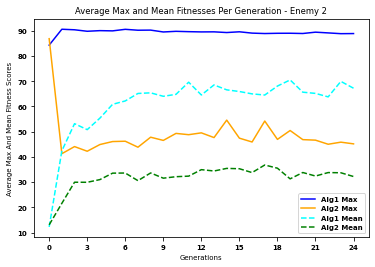

In [23]:
import os
import pickle
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import statistics as st
#   Plots
# ========================================================================
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   :7}
plt.rc('font', **font)
num_of_generations = 25

""" Line Plot - Fitnesses - Max and Mean"""

plt.figure()
axis_config = plt.gca()
plot_color = ['blue', 'cyan', 'green', 'red', 'orange']
axis_x = range(25)
# plot maximum fintesses of the two algorithms
#axis_y = [list of the maximum fitnesses for the algorithm 1]
axis_y=AvMaxsList
plt.plot(axis_x, axis_y, color=plot_color[0])
axis_y = AvMaxsList4
plt.plot(axis_x, axis_y, color=plot_color[4])
# plot mean fitnesses of the two algorithms
axis_y = AvMeansList
plt.plot(axis_x, axis_y, color=plot_color[1], linestyle="--")
axis_y = AvMeansList3
plt.plot(axis_x, axis_y, color=plot_color[2], linestyle="--")

axis_config.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Generations")
plt.ylabel("Average Max And Mean Fitness Scores")
plt.title("Average Max and Mean Fitnesses Per Generation - Enemy 2")
plt.legend(["Alg1 Max ", "Alg2 Max", "Alg1 Mean", "Alg2 Mean"])
plt.savefig('plot_enemy5_averages.png', dpi=80, bbox_inches='tight')
plt.show()
    

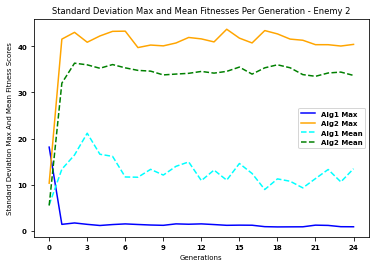

In [25]:
""" Line Plot - Fitnesses - Max and Mean"""

plt.figure()
axis_config = plt.gca()
plot_color = ['blue', 'cyan', 'green', 'red', 'orange']
axis_x = range(25)
# plot maximum fintesses of the two algorithms
#axis_y = [list of the maximum fitnesses for the algorithm 1]
axis_y=StdMaxsList
plt.plot(axis_x, axis_y, color=plot_color[0])
axis_y = StdMaxsList_2
plt.plot(axis_x, axis_y, color=plot_color[4])
# plot mean fitnesses of the two algorithms
axis_y = StdMeansList
plt.plot(axis_x, axis_y, color=plot_color[1], linestyle="--")
axis_y = StdMeansList_2
plt.plot(axis_x, axis_y, color=plot_color[2], linestyle="--")

axis_config.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Generations")
plt.ylabel("Standard Deviation Max And Mean Fitness Scores")
plt.title("Standard Deviation Max and Mean Fitnesses Per Generation - Enemy 2")
plt.legend(["Alg1 Max ", "Alg2 Max", "Alg1 Mean", "Alg2 Mean"])
plt.savefig('plot_enemy5_std.png', dpi=80, bbox_inches='tight')
plt.show()

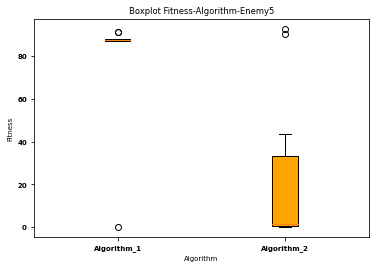

In [34]:
import sys
sys.path.insert(0, "evoman")
from environment import Environment
import numpy as np
from scipy.stats import ttest_ind


# the relative path where the boxplot is going to be stored
boxplot_path = r"C:\\Users\popil\Desktop\boxplot_enemy5.jpg"


def boxplotter(all_fitnesses):
    """
    This function creates a file with 2 boxplots (one for each algorithm)

    :param all_fitnesses: a list with the fitnesses of all the experiments (10 values)
    """
    # colors for boxplots
    colors = ['green', 'orange']

    # create boxplots
    box = plt.boxplot(all_fitnesses, patch_artist=True, labels=["Algorithm_1", "Algorithm_2"])

    # Add title and axis names
    plt.title('Boxplot Fitness-Algorithm-Enemy5')
    plt.xlabel('Algorithm')
    plt.ylabel('Fitness')
    plt.savefig('plot_enemy5_boxplot.png', dpi=80, bbox_inches='tight')

    # add color to boxplots
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
all_fitnesses=[Test_Values,Test_Values1]
boxplotter(all_fitnesses)    